<a href="https://colab.research.google.com/github/ScMofeoluwa/Cell-images/blob/main/Cell_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl 'https://doc-0k-bg-docs.googleusercontent.com/docs/securesc/fvclg2hk1r2vm9ind0aq7vjt6ivsjv9k/358hl0ob3fji7g0a371jom06k0tf83sv/1607716275000/09830891788622587857/09830891788622587857/1vQrN0xm4a2WtZoq19nPNzoiEjw4a-l-I?e=download&authuser=0&nonce=3dd9nlj972o7o&user=09830891788622587857&hash=b79u3c9qme4r5spb5o39hj1a948rrdnt' -H 'User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:83.0) Gecko/20100101 Firefox/83.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' -H 'Accept-Language: en-US,en;q=0.5' --compressed -H 'Connection: keep-alive' -H 'Cookie: AUTH_7oou9snqpr91nk45nrq72fi80msjq315_nonce=3dd9nlj972o7o' -H 'Upgrade-Insecure-Requests: 1' -H 'TE: Trailers' -o cell_images.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  337M    0  337M    0     0  88.9M      0 --:--:--  0:00:03 --:--:-- 88.8M


In [ ]:
from zipfile import ZipFile
file_name = r'cell_images.zip'

In [ ]:
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
cd cell_images/

/content/cell_images


In [ ]:
import random,glob,shutil, os

In [ ]:
from tqdm import tqdm

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from matplotlib.image import imread

In [ ]:
train_path = r'/content/cell_images/train'
test_path = r'/content/cell_images/test'

In [ ]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['parasitized', 'uninfected']
['parasitized', 'uninfected']


In [ ]:
categories = ['uninfected', 'parasitized']

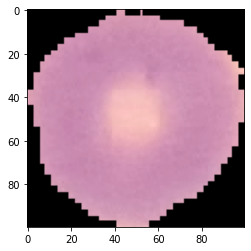

In [ ]:
for category in categories:
  path = os.path.join(train_path,category)
  class_num = categories.index(category)
 
  for img in os.listdir(path):
    img_array = load_img(os.path.join(path,img), target_size=(100,100))
    new_array = img_to_array(img_array)
    plt.imshow(array_to_img(new_array))
    #plt.imshow(array_to_img(new_array),annot =True)
    plt.show()
    break
  break

In [ ]:
training_data = []
test_data = []
 
def create_training_data(directory,categories, data):
  for category in categories:
    path = os.path.join(directory,category)
    class_num = categories.index(category)
 
    for img in tqdm(os.listdir(path)):
      try:
        img_array = load_img(os.path.join(path,img), target_size=(100,100))
        new_array = img_to_array(img_array)
        data.append([new_array,class_num])
      except Exception as e:
        pass

In [ ]:
create_training_data(directory=train_path,
                     categories=categories,data = training_data)
create_training_data(directory=test_path,
                     categories=categories,data = test_data)

100%|██████████| 1300/1300 [00:01<00:00, 1108.90it/s]


In [ ]:
print(len(training_data))
print(len(test_data))

24958
2600


In [ ]:
import random
 
random.shuffle([training_data,test_data])

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []

In [ ]:
def get_features_and_labels(data, features, labels):
  for feature, label in tqdm(data):
    features.append(feature)
    labels.append(label)
  return features, labels

In [ ]:
X_train,y_train = get_features_and_labels(training_data, X_train,y_train)
X_test,y_test = get_features_and_labels(test_data,X_test,y_test)

100%|██████████| 2600/2600 [00:00<00:00, 819507.81it/s]


In [ ]:
print(len(X_train), len(X_test),
      len(y_test), len(y_test))

24958 2600 2600 2600


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
 
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'uninfected')

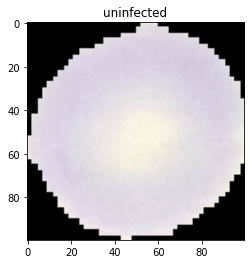

In [ ]:
plt.imshow(array_to_img(X_train[1000]))
plt.title(categories[y_train[1000]])

In [ ]:
def rescale(data):
  data = data/255.
 
  return data

In [ ]:
X_train = rescale(X_train)
X_test = rescale(X_test)

In [ ]:
X_train.shape

(24958, 100, 100, 3)

In [ ]:
print(X_train.max())

1.0


In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=[2,2], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64,kernel_size=[2,2], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 72,kernel_size=[7,7], padding = 'same',
                 input_shape = (100,100,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics =['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 72)        225864    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 72)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10368)            

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min",
                           patience=2 )
 
checkpoint = ModelCheckpoint(filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                             monitor='val_loss', mode = "min", save_best_only=True)

In [ ]:
model.fit(X_train,y_train, validation_split=0.2,batch_size=16, epochs=20,callbacks=[early_stop])

Epoch 1/20
1248/1248 [==============================] - 10s 8ms/step - loss: 0.3712 - accuracy: 0.8207 - val_loss: 0.2452 - val_accuracy: 0.9239
Epoch 2/20
1248/1248 [==============================] - 9s 8ms/step - loss: 0.1325 - accuracy: 0.9596 - val_loss: 0.1788 - val_accuracy: 0.9445
Epoch 3/20
1248/1248 [==============================] - 9s 8ms/step - loss: 0.1174 - accuracy: 0.9627 - val_loss: 0.2201 - val_accuracy: 0.9333
Epoch 4/20
1248/1248 [==============================] - 9s 8ms/step - loss: 0.1101 - accuracy: 0.9659 - val_loss: 0.1790 - val_accuracy: 0.9473


In [ ]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.371175,0.820695,0.245169,0.923878
1,0.132466,0.959581,0.178788,0.944511
2,0.117377,0.962737,0.220096,0.933293
3,0.110086,0.965892,0.178966,0.947316


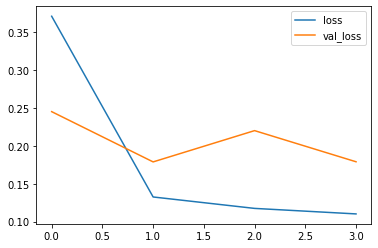

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1300
           1       0.97      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [ ]:
my_image = X_test[60]

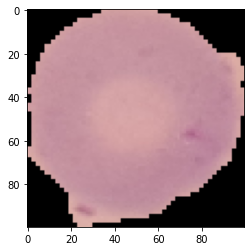

In [ ]:
plt.imshow(my_image)

In [ ]:
y_test[60]

0

In [ ]:
model.predict_classes(my_image.reshape(1,100,100,3))

array([[0]], dtype=int32)